In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\ML projects\ML-Projects\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


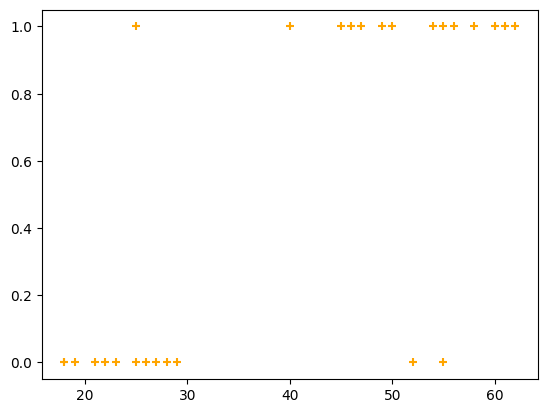

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='orange')

In [7]:
# shape returns the no.of rows and columns
df.shape

(27, 2)

In [21]:
from sklearn.model_selection import train_test_split
x=df[['age']]
y=df['bought_insurance']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test)

array([1, 1, 0])

In [22]:
model.score(x_test,y_test)

1.0

In [26]:
model.predict([[52]])

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])